In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
univ=pd.read_csv("/content/drive/MyDrive/ML & AI/Universities clustering.csv")

In [4]:
univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [5]:
x = univ.iloc[:,1:]

In [6]:
x

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90
5,1340,89,23,10,32162,95
6,1315,90,30,12,31585,95
7,1255,74,24,12,20126,92
8,1400,91,14,11,39525,97
9,1305,75,44,7,58691,87


In [7]:
wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state =1)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

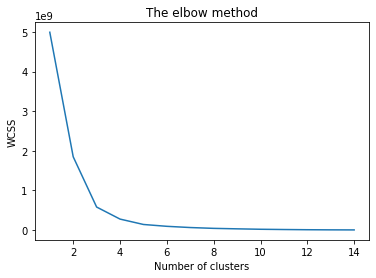

In [8]:
plt.plot(range(1, 15), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [9]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',random_state = 1)
y_kmeans = kmeans.fit_predict(x)

In [10]:
y_kmeans

array([1, 2, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0], dtype=int32)

In [11]:
cluster_labels=pd.Series(y_kmeans)

univ['clust']=cluster_labels # creating a  new column and assigning it to new column 
univ = univ.iloc[:,[7,0,1,2,3,4,5,6]]
univ

,clust,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1,Brown,1310,89,22,13,22704,94
1,2,CalTech,1415,100,25,6,63575,81
2,0,CMU,1260,62,59,9,25026,72
3,0,Columbia,1310,76,24,12,31510,88
4,1,Cornell,1280,83,33,13,21864,90
5,0,Dartmouth,1340,89,23,10,32162,95
6,0,Duke,1315,90,30,12,31585,95
7,1,Georgetown,1255,74,24,12,20126,92
8,0,Harvard,1400,91,14,11,39525,97
9,2,JohnsHopkins,1305,75,44,7,58691,87


In [12]:
print(univ.to_string()) #the enteire data set will shown

    clust          Univ   SAT  Top10  Accept  SFRatio  Expenses  GradRate
0       1         Brown  1310     89      22       13     22704        94
1       2       CalTech  1415    100      25        6     63575        81
2       0           CMU  1260     62      59        9     25026        72
3       0      Columbia  1310     76      24       12     31510        88
4       1       Cornell  1280     83      33       13     21864        90
5       0     Dartmouth  1340     89      23       10     32162        95
6       0          Duke  1315     90      30       12     31585        95
7       1    Georgetown  1255     74      24       12     20126        92
8       0       Harvard  1400     91      14       11     39525        97
9       2  JohnsHopkins  1305     75      44        7     58691        87
10      0           MIT  1380     94      30       10     34870        91
11      0  Northwestern  1260     85      39       11     28052        89
12      1     NotreDame  1255     81  

In [13]:
cluster_labels

0     1
1     2
2     0
3     0
4     1
5     0
6     0
7     1
8     0
9     2
10    0
11    0
12    1
13    1
14    0
15    1
16    0
17    1
18    1
19    0
20    1
21    0
22    1
23    1
24    0
dtype: int32

In [14]:
# getting aggregate mean of each cluster
univ.groupby(univ.clust).mean() 

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust,,,,,,
0,1329.166667,84.833333,29.833333,10.833333,33237.250000,90.666667
1,1181.000000,65.363636,50.272727,15.909091,14871.545455,82.909091
2,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000
